In [1]:
import sys
import os
from pathlib import Path
here = Path.cwd()
sys.path.append(os.path.join(here, "../../src/"))
sys.path.append(os.path.join(here, "../../src/polykin"))
from polykin.distributions import Flory, Poisson, LogNormal

## Instantiate a distribution

The `distributions` module offers two types of theoretical distributions (`Flory` and `Poisson`) and one empirical (`LogNormal`) distribution. To instantiate a distribution object, we call the respective class constructor with the number-average degree of polymerization as required argument and, optionally, the average molar-mass of the repeating units, and the distribution name as additional arguments.

In [2]:
p = Poisson(100)
f = Flory(120, M0=65, name='polymer-F')

For a `LogNormal` distribution, we can also specify the polydispersity index (PDI). 

In [3]:
g = LogNormal(150, PDI=3, M0=123, name='polymer-LN')

The most important properties of a distribution can be displayed with the `print()` command.

In [4]:
print(p)

name: Poisson
DPn:  100.0
DPw:  101.0
DPz:  102.0
PDI:  1.01
M0:   100.0
Mn:   10,000
Mw:   10,099
Mz:   10,197


In [5]:
print(g)

name: polymer-LN
DPn:  150.0
DPw:  450.0
DPz:  1350.0
PDI:  3.00
M0:   123.0
Mn:   18,450
Mw:   55,350
Mz:   166,050


The primary properties of the distribution can be modified, if desired.

In [6]:
p.DPn = 5
p.M0 = 123
p.name = 'polymerZ'
print(p)

name: polymerZ
DPn:  5.0
DPw:  5.8
DPz:  6.5
PDI:  1.16
M0:   123.0
Mn:   615
Mw:   713
Mz:   802


Any of these properties can be accessed by its name.

In [7]:
p.Mz

801.6206896551724

Additionally, the moments of order 0-3 can be evaluated with the `moment()` method.

In [8]:
p.moment(3)/p.moment(2) # compare to DPz

6.517241379310345

## Plot a distribution

The class method `plot()` allows for a quick visualization of the corresponding _number_, _mass_ or _GPC_ probability density function (pdf). If no arguments are specified, the mass pdf is displayed.

<AxesSubplot: xlabel='Chain length', ylabel='Relative abundance'>

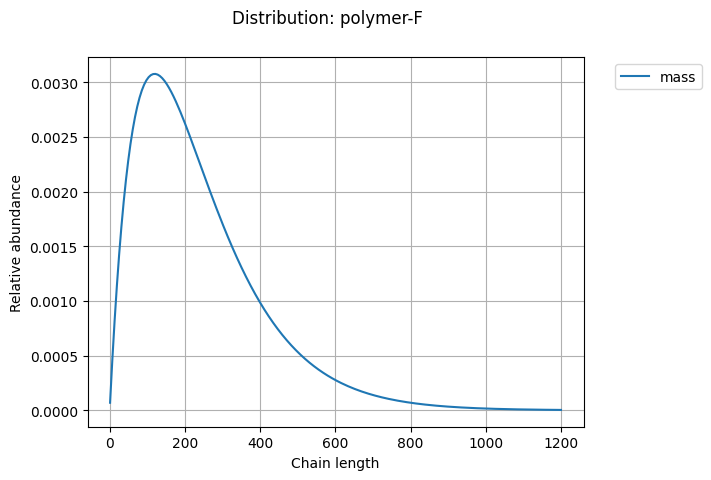

In [9]:
f.plot()

Many other types of plots can be generated. For example, we can draw a plot overlaying the number and mass pdf, with an x-axis based on molar mass rather than chain-length.

<AxesSubplot: xlabel='Molar mass', ylabel='Relative abundance'>

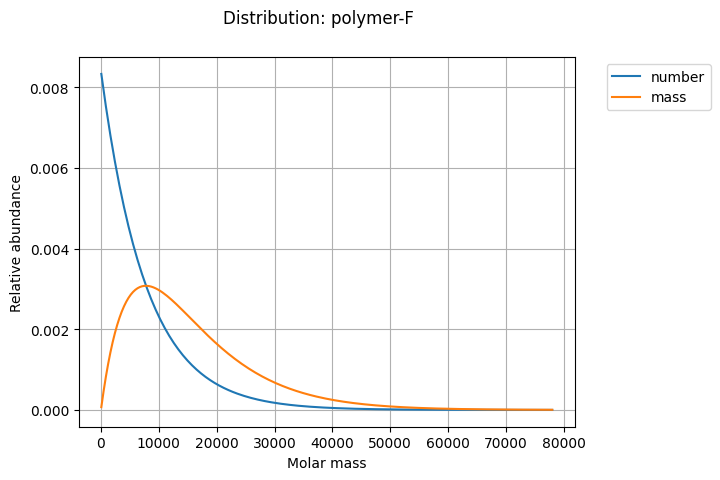

In [10]:
f.plot(['number','mass'], unit_size='molar_mass')

If we select a GPC-type plot, the x-axis scale is automatically switched to 'log'.  

<AxesSubplot: xlabel='Molar mass', ylabel='Relative abundance'>

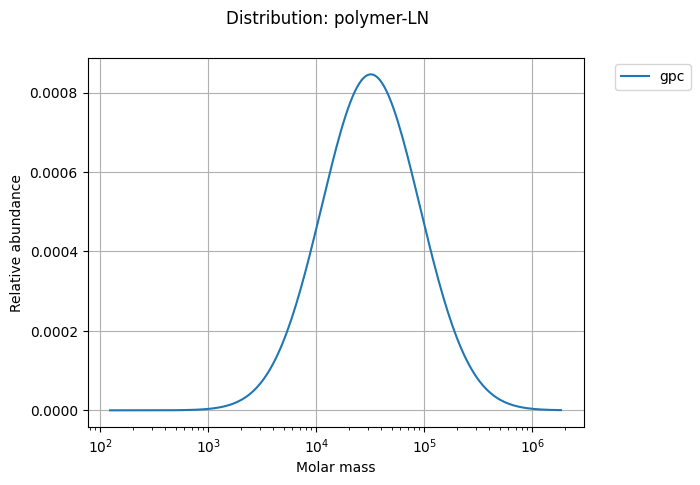

In [11]:
g.plot('gpc', unit_size='molar_mass')

## Probability values

Probability density function (pdf) as well as cumulative density function (cfd) values can be obtained for any chain-length by using the methods `pdf()` and `cdf()`, respectively.

In [12]:
# mass pdf for a single chain-length
f.pdf(120) 

0.0030784980298821795

In [13]:
# mass pdf for a list/array of chain-lengths
f.pdf([110, 120, 130]) 

array([0.00306827, 0.0030785 , 0.00306731])

In [14]:
# number pdf for a list/array of chain molar masses
p.pdf([600, 700, 800], dist='number', unit_size='molar_mass') #

array([0.19791364, 0.17101025, 0.13008108])

The pdf and cdf values are, of course, internally consistent, as illustrated by the example below.

In [15]:
x = [i for i in range(1,6)]
pdf = p.pdf(x, dist='number')
cdf = p.cdf(x[-1], dist='number')
print('sum(pdf):', sum(pdf))
print('cdf:     ', cdf)

sum(pdf): 0.6288369351798734
cdf:      0.6288369351798733


## Random chain-length samples

Random samples of chain-lengths can be generated using the method `random()`.

In [16]:
p.random() # single value

11

In [17]:
p.random(5) # vector of length 5

array([7, 3, 6, 3, 2], dtype=int64)

In [18]:
g.random((3,4)) # array of shape (3,4)

array([[ 94.,  92.,  71., 110.],
       [ 76., 105.,  42., 317.],
       [104.,  45., 463.,  88.]])

The random values are, of course, consistent with the distribution properties, as illustrated below for DPw.

In [19]:
x = f.random(10**5)
DPw_random = sum(x**2)/sum(x)
print("DPw random:", DPw_random)
print("DPw 'true':", f.DPw)

DPw random: 239.51500736115102
DPw 'true': 239.00000000000085


## Composite distributions

The _base_ distributions (`Flory`, `Poisson`, `LogNormal`) can be combined in any proportion to obtain a resulting _composite_ distribution. This capability can be used, for instance, to compute the distribution of a polymer blend, as illustrated below.

First, let's define some base polymer distributions.

In [20]:
a = Flory(100, name="A")
b = Poisson(200, name="B")
c = LogNormal(200, name="C")

Now, we define the blend using common algebra language. The (positive) numerical factors are the mass parts used to prepare the blend.

In [21]:
blend = 0.5*a + 1*b + 0.5*c

In [22]:
print(blend)